In [1]:
# Human Activity REcognitionwith Smart Phones dataset was built from the recordings of study participants
# performing activies daily living ADL while carrying a smart phone with an embedded sensors
# Classify activities from six activities - Walking, Walking Upstairs, Walking Downstairs, Sitting
# Standing, & Laying

- For each record it is provided 
- Triaxial acceleration from accelerometer (total acceleration) & the estimated body acceleration
- Triaxial Angular Velocity from gyroscope
- A 561 feature vector with time & frequency domian variable
- its activity label

In [45]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# from colorsetup import colors, palette

In [6]:
data = pd.read_csv('C:/Users/Administrator/Portfolio Projects/Datasets/Human_Activity_Smartphones_Data.csv')

In [7]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [8]:
data.shape

(10299, 562)

In [10]:
data['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [11]:
data['Activity'].describe()

count      10299
unique         6
top       LAYING
freq        1944
Name: Activity, dtype: object

In [12]:
data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [15]:
# Examining the datatypes as number of columns are huge
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [16]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [19]:
# All rows & all columsn except last columns
data.iloc[:,:-1].min().value_counts()

-1.0    561
dtype: int64

In [20]:
data.iloc[:,:-1].max().value_counts()

1.0    561
dtype: int64

In [22]:
# By looking at the dataset we can say its relatively balanced dataset
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)


In [25]:
data['Activity'].value_counts()

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: Activity, dtype: int64

In [28]:
data['Activity'].sample(5)

5649    5
92      3
84      3
9239    2
5008    3
Name: Activity, dtype: int32

In [29]:
# Correlation values among the independent variables
feature_cols = data.columns[:-1]

In [30]:
corr_values = data[feature_cols].corr()

In [32]:
# For beter readability emptying all the data below diagoanl
tril_index = np.tril_indices_from(corr_values)

In [33]:
tril_index

(array([  0,   1,   1, ..., 560, 560, 560], dtype=int64),
 array([  0,   0,   1, ..., 558, 559, 560], dtype=int64))

In [36]:
# making the unused values NANs
corr_array = np.array(corr_values)
corr_array[np.tril_indices_from(corr_values)] = np.nan

In [37]:
corr_array[np.tril_indices_from(corr_values)]

array([nan, nan, nan, ..., nan, nan, nan])

In [38]:
corr_values = pd.DataFrame(corr_array, columns=corr_values.columns, index = corr_values.index)

In [39]:
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


In [40]:
# Stack the data & convert to dataframe
corr_values = (corr_values 
              .stack()
              .to_frame()
              .reset_index()
               .rename(columns = {'level_0':'feature1',
                                 'level_1':'feature2',
                                 0:'correlation'})
              )

In [41]:
corr_values

,feature1,feature2,correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


In [42]:
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [43]:
corr_values

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


[Text(0.5, 0, 'Absolut Correlation'), Text(0, 0.5, 'Frequency')]

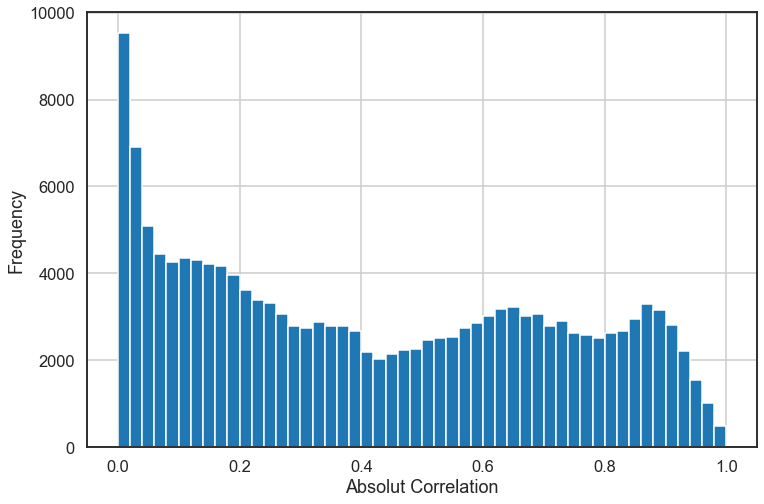

In [47]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins = 50, figsize = (12,8))
ax.set(xlabel = 'Absolut Correlation', ylabel = 'Frequency')

In [48]:
# The most highly correlated values
# Will give values where abs_correlation is greater than 0.8
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [49]:
corr_values.shape

(157080, 4)

In [51]:
# Splitting data into train & test set
# We can using method for train & test split but 
# Using this we can maintain the same ratio of predictor classes
# Regardless of methods used to split the data, compare the ratio of classes in both train & test split

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split index
strat_shuf_split = StratifiedShuffleSplit(n_splits = 1,
                                         test_size = 0.3,
                                         random_state = 42)


In [53]:
strat_shuf_split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.3,
            train_size=None)

In [54]:
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

In [55]:
train_idx

array([1575, 1707, 6425, ..., 3037, 3002,  996], dtype=int64)

In [56]:
test_idx

array([7743,  969, 3175, ..., 8914, 8756, 1470], dtype=int64)

In [57]:
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']
X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'Activity']

In [62]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [64]:
y_test.value_counts(normalize = True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

In [68]:
from sklearn.linear_model import LogisticRegression

# Standard Logistic Regression
# No Hyper Parameters
# No Regularization
# For multiclass we use liblinear that is one against the rest class (one vs the rest)
# that is certain class vs the rest
# We will do this 6 times for 6 different classes
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [66]:
from sklearn.linear_model import LogisticRegressionCV

# L1 Regularised Logistic Regression
lr_l1 = LogisticRegressionCV(Cs = 10, cv = 4, penalty='l1', solver='liblinear' ).fit(X_train, y_train)


In [69]:
from sklearn.linear_model import LogisticRegressionCV

# L2 Regularised Logistic Regression
lr_l2 = LogisticRegressionCV(Cs = 10, cv = 4, penalty='l2', solver='liblinear' ).fit(X_train, y_train)


In [70]:
# Compare the magnitudes of the coefficients for each of the models 
# if one-vs-rest fitting was used, each set of coefficients can be plotted seprately

In [107]:
# Combining all the coefficient into dataframes
coefficients = list()

coeff_labels = ['lr','lr_l1','lr_l2']
coeff_models = [lr, lr_l1, lr_l2]


for lab,mod in zip(coeff_labels,coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels = [[lab], [0,1,2,3,4,5]],
                               codes = [[0,0,0,0,0,0],[0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns = coeff_label))
    
coefficients = pd.concat(coefficients, axis = 1)

coefficients.sample(10)

lr                                                       lr_l1  \
            0         1         2         3         4         5         0   
86  -0.067421 -0.321993 -0.333856  0.055854 -0.141596  0.115792  0.000000   
277  0.086075 -0.250780  0.147541  0.204377 -0.259073  0.084205  0.000000   
378 -0.077083 -0.157725  0.478697  0.676634 -0.087373 -0.029797 -0.046262   
143 -0.201758 -0.080515  0.147956 -0.714691  0.981977  0.196261  0.000000   
387 -0.003746  0.209669  0.250573  0.127880  0.325617  0.099537 -0.003507   
144  0.048247  0.192624 -0.252875  0.330677  0.033203  0.151371  0.000000   
228 -0.053523 -0.105324 -0.297023  0.305931  0.320824 -0.659763  0.000000   
91  -0.016685  0.178146 -0.020750 -0.196773  0.898128 -0.395121  0.000000   
380  0.010256 -0.373729  0.431299  0.555281 -0.186071 -0.133478 -0.162606   
293  0.168310 -0.119691 -0.097917 -0.204395 -0.708327 -0.555319  0.000000   

                                                          lr_l2            \
            1         2         3         4         5         0         1   
86   0.000000  0.000000  0.000000  0.000000  0.235867 -0.114100 -1.123427   
277  0.000000  0.000000  0.000000 -0.648155  0.252415  0.152546  0.540418   
378  0.000000  0.532392  0.871849  0.000000  0.074089 -0.201868 -2.441419   
143 -0.711954  0.114831 -0.671728  3.763486 -0.241657 -0.393549 -0.847418   
387  0.094277  0.172303  0.000000  0.124200  0.110511 -0.027258  0.502489   
144  0.000000  0.030518  0.000000  0.000000  0.043572  0.130266  0.263246   
228  0.000000  0.000000  0.000000  0.246430 -1.532916 -0.093216 -0.232924   
91   0.000000  0.000000  0.000000  1.287028 -0.519201 -0.037154  1.092019   
380 -0.613110  0.918628  0.313878  0.000000 -0.109614  0.019675 -3.314411   
293  0.000000  0.000000  0.000000 -1.899976 -1.980780  0.397506 -0.442555   

                                             
            2         3         4         5  
86  -0.430046 -0.027770 -0.367056  0.662760  
277  0.189940  0.477189 -0.548123  0.268521  
378  0.937631  1.385272 -0.008617  0.283636  
143  0.224306 -1.913876  2.007572 -0.111681  
387  0.354069  0.307549  0.514447  0.611881  
144 -0.155427  0.476883  0.302570  0.619495  
228 -0.444360  0.943191  0.604819 -2.070956  
91  -0.107200 -0.660364  1.808322 -1.132714  
380  0.871269  1.278530 -0.272104 -0.913947  
293 -0.182373 -0.897170 -1.495800 -2.408237

In [133]:
coefficients.shape

(561, 18)

In [73]:
list(zip(coeff_labels,coeff_models))

[('lr', LogisticRegression(solver='liblinear')),
 ('lr_l1', LogisticRegressionCV(cv=4, penalty='l1', solver='liblinear')),
 ('lr_l2', LogisticRegressionCV(cv=4, solver='liblinear'))]

In [74]:
for a, b in zip(coeff_labels,coeff_models):
    print(a)

lr
lr_l1
lr_l2


In [77]:
for a, b in zip(coeff_labels,coeff_models):
    print(b.coef_)
    print(b.coef_.shape)

[[-0.08750646  0.01449275  0.03018717 ...  1.59910474 -0.3743129
  -0.18830925]
 [-0.44522578 -0.2010464   0.06319646 ... -2.4730943  -0.74039714
  -0.29802244]
 [ 0.25796347  0.06089227  0.24590906 ... -0.85461227  1.77145494
   0.41692015]
 [-0.16928427 -0.02350911  0.0223387  ... -0.31314223 -0.24290398
   0.0650466 ]
 [ 0.76561104  0.10796676  0.05898011 ... -0.71269425 -0.27513871
  -0.04236273]
 [-0.08008379 -0.24719315 -0.40252631 ...  0.41631129  0.876728
   0.43881543]]
(6, 561)
[[ 0.          0.          0.         ...  1.1912869   0.
   0.        ]
 [ 0.          0.          0.         ... -8.18350329  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 4.29269192  0.          0.         ... -0.79797996  0.
   0.        ]
 [-0.72202105 -8.19505092 -3.09759175 ...  0.44570899  3.59375054
   3.86555826]]
(6, 561)
[[-0.13528255  0.02933412  0.04058132 ...  2.949028

In [79]:
lr.coef_.shape

(6, 561)

In [89]:
coeff_labels = ['lr','lr_l1','lr_l2']
for lab in(coeff_labels):
    print(lab)
    pd.MultiIndex(levels = [[lab], [0,1,2,3,4,5]],
                                codes = [[0,0,0,0,0,0],[0,1,2,3,4,5]])

lr
lr_l1
lr_l2


In [100]:
coefficients

[           lr                                                  
             0         1         2         3         4         5
 0   -0.087506 -0.445226  0.257963 -0.169284  0.765611 -0.080084
 1    0.014493 -0.201046  0.060892 -0.023509  0.107967 -0.247193
 2    0.030187  0.063196  0.245909  0.022339  0.058980 -0.402526
 3    0.004590 -0.733963 -0.352732 -0.701328  0.266984  0.696120
 4   -0.045407 -0.034154 -0.451850  0.260244 -0.516844  0.106248
 ..        ...       ...       ...       ...       ...       ...
 556 -0.022132 -0.659468  0.550630 -0.234927  0.385178 -0.351492
 557  0.058454 -0.246969  0.268995 -0.162010 -0.157603  0.174153
 558  1.599105 -2.473094 -0.854612 -0.313142 -0.712694  0.416311
 559 -0.374313 -0.740397  1.771455 -0.242904 -0.275139  0.876728
 560 -0.188309 -0.298022  0.416920  0.065047 -0.042363  0.438815
 
 [561 rows x 6 columns],
         lr_l1                                                  
             0         1         2         3         4         

In [105]:
coefficients[0]

lr                                                  
            0         1         2         3         4         5
0   -0.087506 -0.445226  0.257963 -0.169284  0.765611 -0.080084
1    0.014493 -0.201046  0.060892 -0.023509  0.107967 -0.247193
2    0.030187  0.063196  0.245909  0.022339  0.058980 -0.402526
3    0.004590 -0.733963 -0.352732 -0.701328  0.266984  0.696120
4   -0.045407 -0.034154 -0.451850  0.260244 -0.516844  0.106248
..        ...       ...       ...       ...       ...       ...
556 -0.022132 -0.659468  0.550630 -0.234927  0.385178 -0.351492
557  0.058454 -0.246969  0.268995 -0.162010 -0.157603  0.174153
558  1.599105 -2.473094 -0.854612 -0.313142 -0.712694  0.416311
559 -0.374313 -0.740397  1.771455 -0.242904 -0.275139  0.876728
560 -0.188309 -0.298022  0.416920  0.065047 -0.042363  0.438815

[561 rows x 6 columns]

In [103]:
type(coefficients[0])

pandas.core.frame.DataFrame

In [106]:
data.shape

(10299, 562)

In [109]:
lr.coef_.shape

(6, 561)

In [111]:
lr.coef_[0].shape

(561,)

In [113]:
lr.coef_[0][0]

-0.08750645744001681

In [114]:
lr.coef_[1][0]

-0.4452257776957952

In [115]:
lr.coef_[2][0]

0.2579634671091469

In [116]:
lr.coef_[3][0]

-0.16928427185606562

In [117]:
lr.coef_[4][0]

0.7656110352462109

In [118]:
lr.coef_[5][0]

-0.08008379301681715

In [120]:
data.head(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,2


In [124]:
lr.coef_.T.shape

(561, 6)

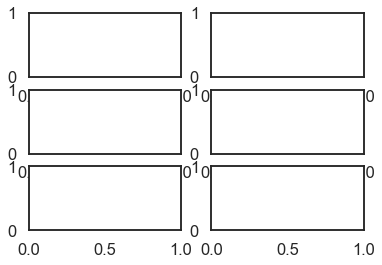

In [125]:
fig, axList = plt.subplots(nrows = 3, ncols = 2)

In [126]:
axList = axList.flatten()

In [127]:
axList

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [129]:
fig.set_size_inches(10,10)

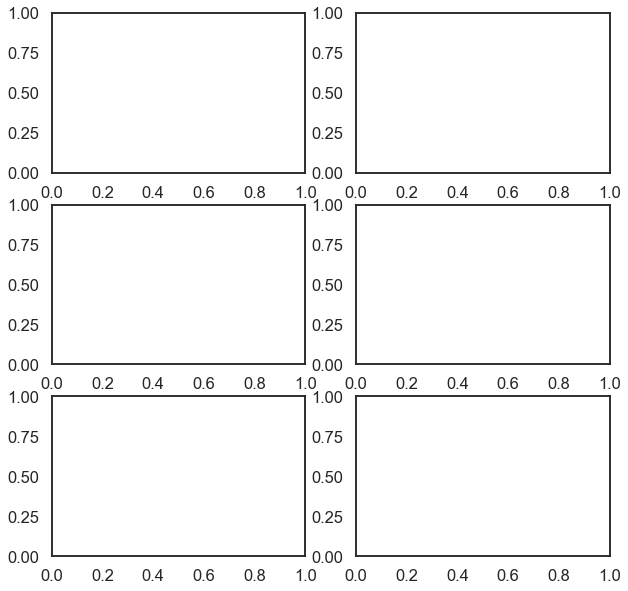

In [130]:
fig

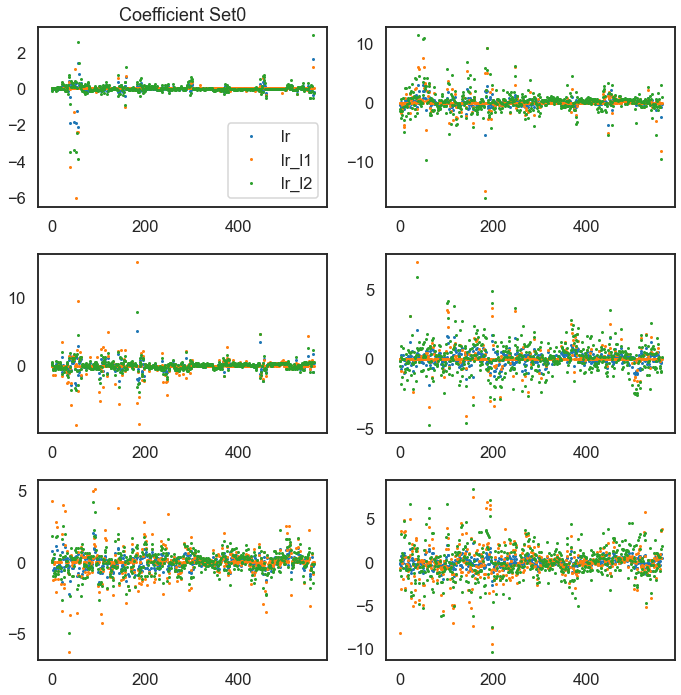

In [132]:
fig, axList = plt.subplots(nrows = 3, ncols = 2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for loc, ax in enumerate(axList):
    data = coefficients.xs(loc, level = 1, axis = 1)
    data.plot(marker = 'o', ls = '', ms = 2.0, ax = ax, legend = False)
    
    if ax is axList[0]:
        ax.legend(loc = 4)
        
        ax.set(title = 'Coefficient Set' + str(loc))
        
        
        
plt.tight_layout()
        